In [22]:
library(dplyr)
library(ggplot2)

# Missing values

https://www.kaggle.com/mnassrib/telecom-churn-datasets

In [4]:
PATH <- "/home/creyesp/Downloads/datasets/Telecom Churn Dataset/churn-bigml-80.csv"
churn <- read.csv(PATH, sep = ",")
glimpse(churn)

Rows: 2,666
Columns: 20
$ State                  <fct> KS, OH, NJ, OH, OK, AL, MA, MO, WV, RI, IA, MT…
$ Account.length         <int> 128, 107, 137, 84, 75, 118, 121, 147, 141, 74,…
$ Area.code              <int> 415, 415, 415, 408, 415, 510, 510, 415, 415, 4…
$ International.plan     <fct> No, No, No, Yes, Yes, Yes, No, Yes, Yes, No, N…
$ Voice.mail.plan        <fct> Yes, Yes, No, No, No, No, Yes, No, Yes, No, No…
$ Number.vmail.messages  <int> 25, 26, 0, 0, 0, 0, 24, 0, 37, 0, 0, 0, 0, 27,…
$ Total.day.minutes      <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 218.…
$ Total.day.calls        <int> 110, 123, 114, 71, 113, 98, 88, 79, 84, 127, 9…
$ Total.day.charge       <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98, 37.0…
$ Total.eve.minutes      <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 348.5…
$ Total.eve.calls        <int> 99, 103, 110, 88, 122, 101, 108, 94, 111, 148,…
$ Total.eve.charge       <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75, 29.62…
$ Total.night.minutes    <db

In [46]:
head(churn)

,State,Account.length,Area.code,International.plan,Voice.mail.plan,Number.vmail.messages,Total.day.minutes,Total.day.calls,Total.day.charge,Total.eve.minutes,Total.eve.calls,Total.eve.charge,Total.night.minutes,Total.night.calls,Total.night.charge,Total.intl.minutes,Total.intl.calls,Total.intl.charge,Customer.service.calls,Churn
,<fct>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<fct>
1,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
2,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
3,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
5,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
6,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


In [8]:
summary(churn)

     State      Account.length    Area.code     International.plan
 WV     :  88   Min.   :  1.0   Min.   :408.0   No :2396          
 MN     :  70   1st Qu.: 73.0   1st Qu.:408.0   Yes: 270          
 NY     :  68   Median :100.0   Median :415.0                     
 VA     :  67   Mean   :100.6   Mean   :437.4                     
 AL     :  66   3rd Qu.:127.0   3rd Qu.:510.0                     
 OH     :  66   Max.   :243.0   Max.   :510.0                     
 (Other):2241                                                     
 Voice.mail.plan Number.vmail.messages Total.day.minutes Total.day.calls
 No :1933        Min.   : 0.000        Min.   :  0.0     Min.   :  0.0  
 Yes: 733        1st Qu.: 0.000        1st Qu.:143.4     1st Qu.: 87.0  
                 Median : 0.000        Median :179.9     Median :101.0  
                 Mean   : 8.022        Mean   :179.5     Mean   :100.3  
                 3rd Qu.:19.000        3rd Qu.:215.9     3rd Qu.:114.0  
                 Max.   :5

In [62]:
churn %>% 
    filter(Total.intl.minutes < 10) %>%
    sapply(mean)

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”


State         Account.length              Area.code 
                    NA              99.502082             438.707744 
    International.plan        Voice.mail.plan  Number.vmail.messages 
                    NA                     NA               8.229808 
     Total.day.minutes        Total.day.calls       Total.day.charge 
            181.130641              99.794338              30.792748 
     Total.eve.minutes        Total.eve.calls       Total.eve.charge 
            201.437552             100.202331              17.122465 
   Total.night.minutes      Total.night.calls     Total.night.charge 
            201.183930             100.728560               9.053397 
    Total.intl.minutes       Total.intl.calls      Total.intl.charge 
              7.825729               4.416320               2.113564 
Customer.service.calls                  Churn 
              1.586178                     NA

In [65]:
dplyr::select_if(churn, is.numeric) %>% 
    filter(Total.intl.minutes < 10) %>%
    sapply(mean)

Account.length              Area.code  Number.vmail.messages 
             99.502082             438.707744               8.229808 
     Total.day.minutes        Total.day.calls       Total.day.charge 
            181.130641              99.794338              30.792748 
     Total.eve.minutes        Total.eve.calls       Total.eve.charge 
            201.437552             100.202331              17.122465 
   Total.night.minutes      Total.night.calls     Total.night.charge 
            201.183930             100.728560               9.053397 
    Total.intl.minutes       Total.intl.calls      Total.intl.charge 
              7.825729               4.416320               2.113564 
Customer.service.calls 
              1.586178

`summarise()` ungrouping output (override with `.groups` argument)



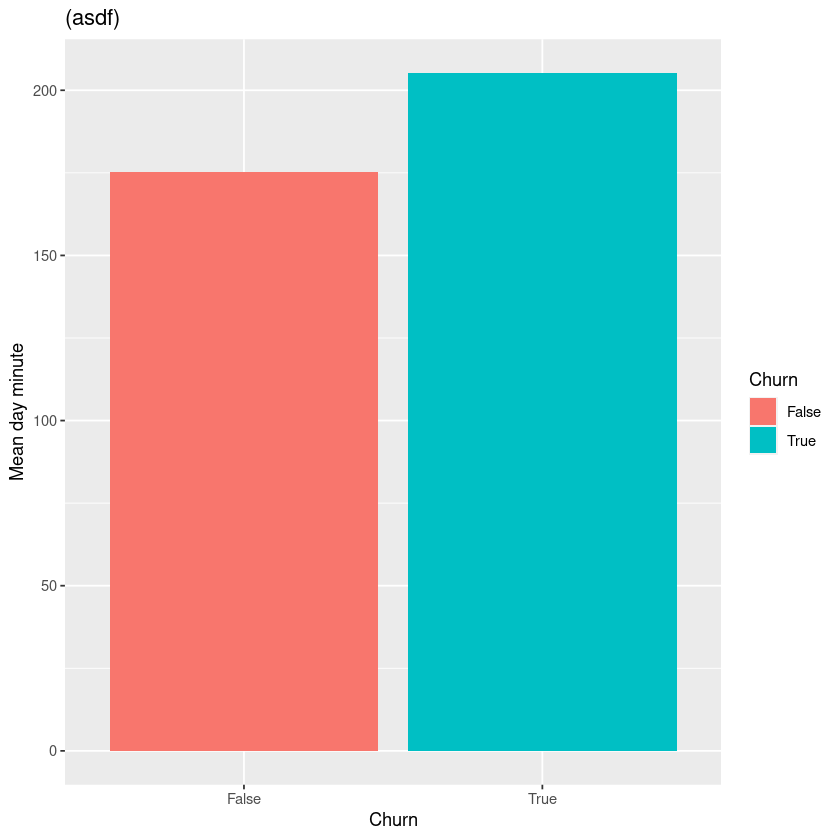

In [42]:
churn %>%
    group_by(Churn) %>%
    summarise(mean_day_minute = mean(Total.day.minutes),
              mean_account = mean(Account.length[Total.intl.minutes > 10]),) %>%
    ggplot(aes(x=Churn, y= mean_day_minute, fill=Churn)) +
        geom_bar(stat = "identity") +
        #geom_line() + 
        labs(
            x = "Churn",
            y = "Mean day minute",
            title = "(asdf)"
        )